<h1><b>Flower Image Classification with Convolutional Neural Network</b></h1>
<li><b>Name:</b> Shankalpa Pokharel</li>


In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip /content/drive/MyDrive/AI_ML_assessment/Flower_Classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: Flower_Classification/Train/tulip/14241883744_ff69de8b7f_n.jpg  
  inflating: __MACOSX/Flower_Classification/Train/tulip/._14241883744_ff69de8b7f_n.jpg  
  inflating: Flower_Classification/Train/tulip/14957470_6a8c272a87_m.jpg  
  inflating: __MACOSX/Flower_Classification/Train/tulip/._14957470_6a8c272a87_m.jpg  
  inflating: Flower_Classification/Train/tulip/4312181724_16dab26afb_n.jpg  
  inflating: __MACOSX/Flower_Classification/Train/tulip/._4312181724_16dab26afb_n.jpg  
  inflating: Flower_Classification/Train/tulip/14127532150_112823a8f6.jpg  
  inflating: __MACOSX/Flower_Classification/Train/tulip/._14127532150_112823a8f6.jpg  
  inflating: Flower_Classification/Train/tulip/16133917184_b5755756bd_n.jpg  
  inflating: __MACOSX/Flower_Classification/Train/tulip/._16133917184_b5755756bd_n.jpg  
  inflating: Flower_Classification/Train/tulip/14116780333_7836f4448c.jpg  
  inflating: __MACOSX/Flower_Classification/Train/

## **Partitioning Flower Images for Model Training: Validation and Test Sets**

In [ ]:
import os
import shutil
import random

# Define the path to the dataset
dataset_path = "Flower_Classification"

# Define the path to the training, validation, and test datasets
train_path = os.path.join(dataset_path, "Train")
valid_path = os.path.join(dataset_path, "Valid")
test_path = os.path.join(dataset_path, "Test_new")

# Remove the old validation and test directories if they exist
if os.path.exists(valid_path):
    shutil.rmtree(valid_path)
if os.path.exists(test_path):
    shutil.rmtree(test_path)

# Create the validation and test directories
os.makedirs(valid_path)
os.makedirs(test_path)

# Get the list of subdirectories (i.e., flower classes) in the training directory
subdirs = [subdir for subdir in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, subdir))]

# Loop over the subdirectories and move a random subset to the validation and test directories
for subdir in subdirs:
    subdir_path = os.path.join(train_path, subdir)
    valid_subdir_path = os.path.join(valid_path, subdir)
    test_subdir_path = os.path.join(test_path, subdir)

    # Create the validation and test subdirectories if they don't exist
    os.makedirs(valid_subdir_path)
    os.makedirs(test_subdir_path)

    # Get the list of image filenames in the subdirectory
    image_filenames = [filename for filename in os.listdir(subdir_path) if filename.endswith(".jpg")]

    # Compute the number of images to move to the validation and test subdirectories
    num_images_valid = int(len(image_filenames) * 0.15)
    num_images_test = int(len(image_filenames) * 0.1)

    # Randomly select a subset of images to move to the validation and test subdirectories
    images_valid = random.sample(image_filenames, num_images_valid)
    remaining_images = list(set(image_filenames) - set(images_valid))
    images_test = random.sample(remaining_images, num_images_test)

    # Move the images to the validation and test subdirectories
    for image_filename in images_valid:
        src_path = os.path.join(subdir_path, image_filename)
        dst_path = os.path.join(valid_subdir_path, image_filename)
        shutil.move(src_path, dst_path)

    for image_filename in images_test:
        src_path = os.path.join(subdir_path, image_filename)
        dst_path = os.path.join(test_subdir_path, image_filename)
        shutil.move(src_path, dst_path)


In [ ]:
import os
import glob

test_p = os.path.join(dataset_path, "Test")

# Count the total number of images in the dataset
total_images = len(glob.glob(os.path.join(dataset_path, "**/*.jpg"), recursive=True))

# Count the number of images per class in the train directory
train_images_per_class = {}
for class_dir in os.listdir(train_path):
    class_path = os.path.join(train_path, class_dir)
    if os.path.isdir(class_path):
        num_images = len(glob.glob(os.path.join(class_path, "*.jpg")))
        train_images_per_class[class_dir] = num_images

# Count the number of images per class in the validation directory
valid_images_per_class = {}
for class_dir in os.listdir(valid_path):
    class_path = os.path.join(valid_path, class_dir)
    if os.path.isdir(class_path):
        num_images = len(glob.glob(os.path.join(class_path, "*.jpg")))
        valid_images_per_class[class_dir] = num_images


# Count the number of images per class in the test_new directory
test_new_per_class = {}
for class_dir in os.listdir(test_path):
    class_path = os.path.join(test_path, class_dir)
    if os.path.isdir(class_path):
        num_images = len(glob.glob(os.path.join(class_path, "*.jpg")))
        test_new_per_class[class_dir] = num_images



test_path_img = os.path.join(dataset_path, "Test")
# Count the number of images in the test directory
test_images = len(glob.glob(os.path.join(test_path_img, "*.jpg")))

print(f"Total number of images in the dataset: {total_images}")
print(f"Number of images per class in train directory: {train_images_per_class}")
print(f"Number of images per class in valid directory: {valid_images_per_class}")
print(f"Number of images per class in Test directory: {test_new_per_class}")
print(f"Number of images in test directory: {test_images}")

Total number of images in the dataset: 4317
Number of images per class in train directory: {'rose': 588, 'sunflower': 550, 'dandelion': 789, 'tulip': 738, 'daisy': 573}
Number of images per class in valid directory: {'rose': 117, 'sunflower': 109, 'dandelion': 157, 'tulip': 147, 'daisy': 114}
Number of images per class in Test directory: {'rose': 78, 'sunflower': 73, 'dandelion': 105, 'tulip': 98, 'daisy': 76}
Number of images in test directory: 5



The flower image dataset is divided into three sections - training, validation, and testing. To accomplish this, 15% of images are randomly selected from each subdirectory and moved to the validation directory. Then, 10% of the remaining images are selected and moved to the test directory as per the user's specifications. The program counts the number of images in each directory after pre-computation and prints out the total number of images in the dataset as well as the number of images per class in the training, validation, and testing sets.

##**Data Augumentation**

Here we implement the following data augmentations using the ImageDataGenerator class:

* Rotation of the image by a maximum of 20 degrees (rotation_range)

* Shifting the width and height of the image by a maximum of 20%
(width_shift_range, height_shift_range)

* Shearing the image by a maximum of 20% (shear_range)

* Zooming into/out of the image by a maximum of 20% (zoom_range)

* Flipping the image horizontally (horizontal_flip) and vertically (vertical_flip)

* Filling any empty pixels resulting from the above transformations with the nearest pixel (fill_mode).

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the training dataset
train_path = os.path.join(dataset_path, "Train")

# Define the path to the augmented dataset
aug_path = os.path.join(dataset_path, "Train_Augmented")

# Create the augmented directory if it doesn't exist
if not os.path.exists(aug_path):
    os.makedirs(aug_path)

# Define the data augmentations to apply
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)


train_subdirs = [subdir for subdir in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, subdir))]



# Loop over the subdirectories and copy the original images to the new directory
for subdir in train_subdirs:
    subdir_path = os.path.join(train_path, subdir)
    aug_subdir_path = os.path.join(aug_path, subdir)

    # Create the augmented subdirectory if it doesn't exist
    if not os.path.exists(aug_subdir_path):
        os.makedirs(aug_subdir_path)

    # Get the list of image filenames in the subdirectory
    image_filenames = [os.path.join(subdir_path, filename) for filename in os.listdir(subdir_path) if filename.endswith(".jpg")]

    # Loop over the images and copy them to the new directory
    for image_filename in image_filenames:
        shutil.copy(image_filename, aug_subdir_path)

    # Loop over the images and apply the augmentations
    for image_filename in image_filenames:
        # Load the image
        image = tf.keras.preprocessing.image.load_img(image_filename)

        # Convert the image to a numpy array
        image_array = tf.keras.preprocessing.image.img_to_array(image)

        # Reshape the array to have a batch size of 1
        image_array = image_array.reshape((1,) + image_array.shape)

        # Generate the augmented images
        i = 0
        for batch in datagen.flow(image_array, save_to_dir=aug_subdir_path, save_prefix=subdir, save_format="jpg"):
            i += 1
            if i >= 10:
                break


In [ ]:
train_path = os.path.join(dataset_path, "Train_Augmented")
train_images_per_class = {}
for class_dir in os.listdir(train_path):
    class_path = os.path.join(train_path, class_dir)
    if os.path.isdir(class_path):
        num_images = len(glob.glob(os.path.join(class_path, "*.jpg")))
        train_images_per_class[class_dir] = num_images


print(f"Number of images per class in train directory: {train_images_per_class}")


Number of images per class in train directory: {'rose': 5012, 'sunflower': 4772, 'dandelion': 6294, 'tulip': 5968, 'daisy': 4939}


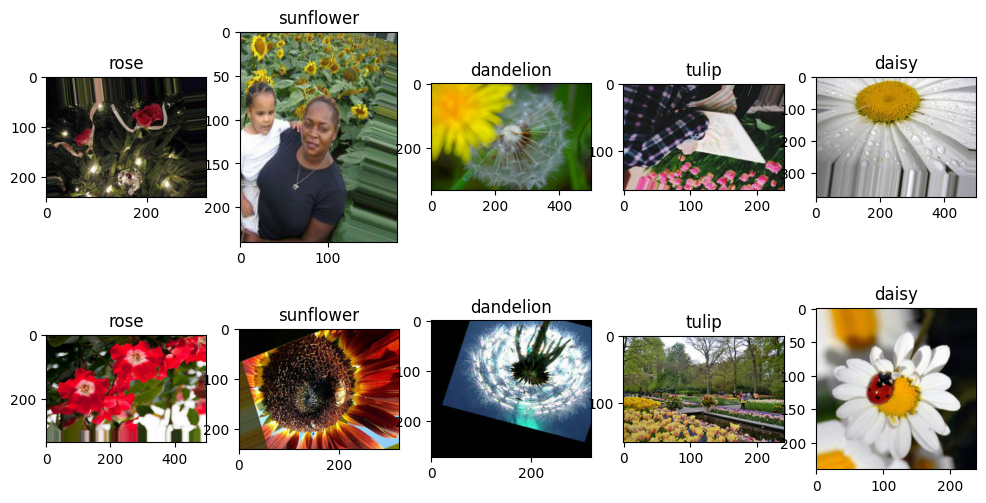

In [ ]:
# Augumented Picture

import matplotlib.pyplot as plt

# plot 10 sample images from the augmented dataset
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
for i, class_folder in enumerate(os.listdir(aug_path)[:5]):
    images = os.listdir(os.path.join(aug_path, class_folder))[:2]
    for j, image in enumerate(images):
        image_path = os.path.join(aug_path, class_folder, image)
        img = plt.imread(image_path)
        ax[j, i].imshow(img)
        ax[j, i].set_title(class_folder)
plt.show()


The image above illustrates a process called image data augmentation, which is a popular technique in deep learning used to improve the model's generalization by increasing the number of training samples. To do this, the program sets the paths to the original training images and the directory where the augmented images will be saved. The Keras ImageDataGenerator is then used to specify the augmentations to apply to the images, such as rotation, shifting, shearing, and flipping.

Next, the program goes through each subdirectory in the training directory and creates a corresponding subdirectory in the augmented directory. For every image file in the original directory, ten new images are produced in the augmented directory using the specified augmentations. These newly generated images are saved in the newly created subdirectory with a prefix indicating the original image's class label.

The result of this process is an enlarged training dataset containing augmented images. These images can be used to train deep learning models that are more robust and effective. Further information on how to use this augmented dataset will be discussed in later sections.

#**1. Prediction Using Customized Model**

This code defines a sequential model architecture for a convolutional neural network with several layers, including convolutional layers, pooling layers, and fully connected layers. The model takes an input image of size 224x224x3 and outputs a probability distribution over 5 classes using a softmax activation function in the final layer. The model also includes batch normalization and dropout regularization to improve performance.

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

# Define the model architecture
# Define the model architecture
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)), # Apply 32 filters of size 3x3 to the input image, using ReLU activation
    BatchNormalization(), # Normalize the activations of the previous layer at each batch
    MaxPooling2D((2, 2)), # Apply max pooling with pool size of 2x2 and stride of 2
    Conv2D(64, (3, 3), activation='relu'), # Apply 64 filters of size 3x3 to the output of previous layer, using ReLU activation
    BatchNormalization(), # Normalize the activations of the previous layer at each batch
    MaxPooling2D((2, 2)), # Apply max pooling with pool size of 2x2 and stride of 2
    Conv2D(128, (3, 3), activation='relu'), # Apply 128 filters of size 3x3 to the output of previous layer, using ReLU activation
    BatchNormalization(), # Normalize the activations of the previous layer at each batch
    MaxPooling2D((2, 2)), # Apply max pooling with pool size of 2x2 and stride of 2
    Conv2D(256, (3, 3), activation='relu'), # Apply 256 filters of size 3x3 to the output of previous layer, using ReLU activation
    BatchNormalization(), # Normalize the activations of the previous layer at each batch
    MaxPooling2D((2, 2)), # Apply max pooling with pool size of 2x2 and stride of 2
    Flatten(), # Flatten the output of the previous layer
    Dense(512, activation='relu'), # Apply a fully connected layer with 512 units to the flattened input, using ReLU activation
    BatchNormalization(), # Normalize the activations of the previous layer at each batch
    Dropout(0.5), # Apply dropout regularization with rate 0.5
    Dense(256, activation='relu'), # Apply another fully connected layer with 256 units to the output of previous layer, using ReLU activation
    BatchNormalization(), # Normalize the activations of the previous layer at each batch
    Dropout(0.5), # Apply dropout regularization with rate 0.5
    Dense(5, activation='softmax') # Apply a fully connected layer with 5 units to the output of previous layer, using softmax activation
])

In [ ]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             )

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the batch size for training
batch_size = 64

# Define the data generators for training, validation and testing data
train_datagen = ImageDataGenerator(rescale=1./255) # Rescale the pixel values of images to [0,1]
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented images for training data
train_generator = train_datagen.flow_from_directory(
        'Flower_Classification/Train_Augmented', # Path to the directory containing the training images
        target_size=(224, 224), # Resize the images to 224x224
        batch_size=batch_size, # Set the batch size for training
        class_mode='categorical' # Use categorical cross-entropy loss for multi-class classification
)

# Generate batches of validation images
val_generator = val_datagen.flow_from_directory(
        'Flower_Classification/Valid', # Path to the directory containing the validation images
        target_size=(224, 224), # Resize the images to 224x224
        batch_size=batch_size, # Set the batch size for validation
        class_mode='categorical' # Use categorical cross-entropy loss for multi-class classification
)

# Generate batches of testing images
test_generator = test_datagen.flow_from_directory(
        'Flower_Classification/Test_new', # Path to the directory containing the testing images
        target_size=(224, 224), # Resize the images to 224x224
        class_mode='categorical' # Use categorical cross-entropy loss for multi-class classification
)


Found 26985 images belonging to 5 classes.
Found 644 images belonging to 5 classes.
Found 430 images belonging to 5 classes.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                        

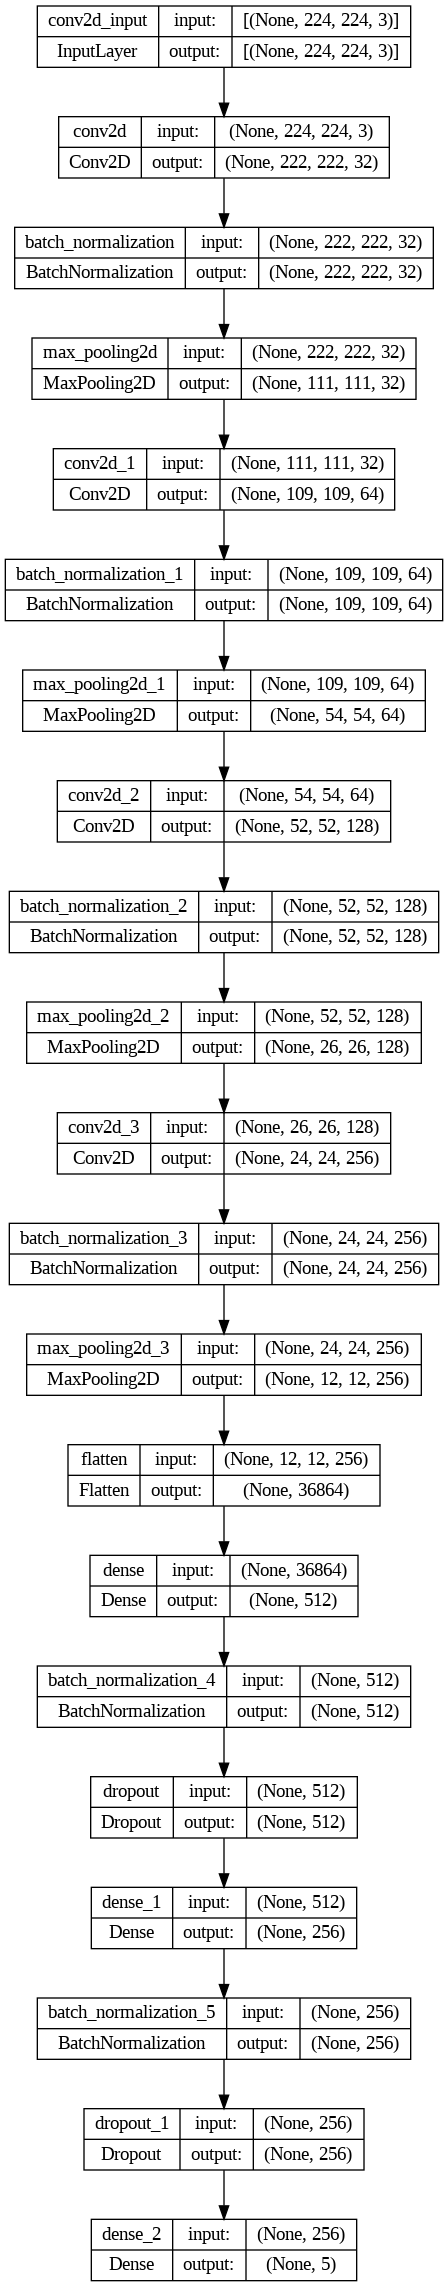

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='custom_model.png', show_shapes=True, show_layer_names=True)

### **Training of the Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3)

from keras.callbacks import ModelCheckpoint

# Define a file path where the best model weights will be saved
checkpoint_path = "flower_classification_best_custom.h5"

# Define the ModelCheckpoint callback to save the best model weights during training
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,  # Save only the best model weights
    mode='min',  # Choose the best model based on minimum validation loss
    verbose=1  # Print a message when the best model weights are saved
)

# Train the model using the defined callbacks
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop, checkpoint]  # Use the EarlyStopping and ModelCheckpoint callbacks during training
)


Epoch 1/20
422/422 [==============================] - ETA: 0s - loss: 1.1673 - accuracy: 0.5757
Epoch 1: val_loss improved from inf to 2.20118, saving model to flower_classification_best_custom.h5
422/422 [==============================] - 125s 259ms/step - loss: 1.1673 - accuracy: 0.5757 - val_loss: 2.2012 - val_accuracy: 0.3556
Epoch 2/20
422/422 [==============================] - ETA: 0s - loss: 0.7620 - accuracy: 0.7095
Epoch 2: val_loss improved from 2.20118 to 0.74076, saving model to flower_classification_best_custom.h5
422/422 [==============================] - 118s 281ms/step - loss: 0.7620 - accuracy: 0.7095 - val_loss: 0.7408 - val_accuracy: 0.7189
Epoch 3/20
422/422 [==============================] - ETA: 0s - loss: 0.6033 - accuracy: 0.7678
Epoch 3: val_loss improved from 0.74076 to 0.64543, saving model to flower_classification_best_custom.h5
422/422 [==============================] - 119s 281ms/step - loss: 0.6033 - accuracy: 0.7678 - val_loss: 0.6454 - val_accuracy: 0.7

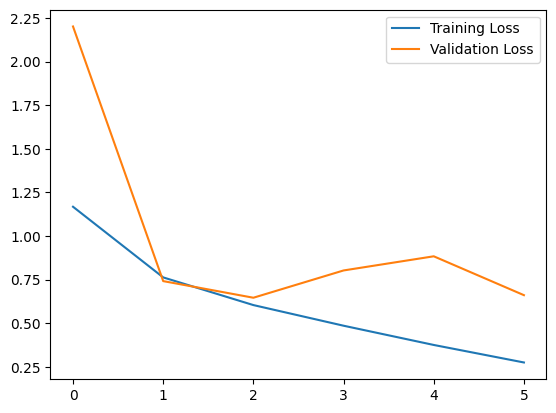

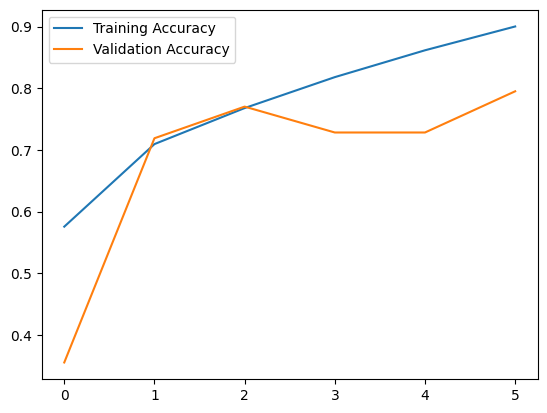

In [ ]:

# plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

###**Evaluating the model**

1/1 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

       daisy       0.82      0.80      0.81        76
   dandelion       0.74      0.82      0.78       105
        rose       0.67      0.76      0.71        78
   sunflower       0.81      0.78      0.80        73
       tulip       0.78      0.65      0.71        98

    accuracy                           0.76       430
   macro avg       0.77      0.76      0.76       430
weighted avg       0.76      0.76      0.76       430



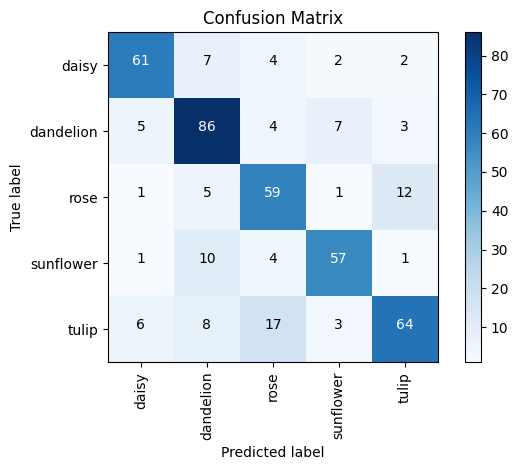

14/14 [==============================] - 2s 121ms/step - loss: 0.7347 - accuracy: 0.7605
Test accuracy: 0.760465145111084
Test loss: 0.7347314953804016


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools # added import for itertools
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Define the paths to the test data and the saved model
test_data_path = 'Flower_Classification/Test_new'
saved_model_path = '/content/flower_classification_best_custom.h5'

# Load the saved model
model = load_model(saved_model_path)

# Define the class names
# Get the class names from the test_generator's class indices
class_names = list(test_generator.class_indices.keys())

# Initialize empty lists for true labels and predicted labels
y_true = []
y_pred = []

# Iterate over the test data and make predictions
for class_name in class_names:
    class_path = os.path.join(test_data_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        # Load the image and convert it to a numpy array
        img = load_img(img_path, target_size=(224, 224))
        img_arr = img_to_array(img)
        # Expand the dimensions of the array to match the input shape of the model
        img_arr = np.expand_dims(img_arr, axis=0)
        # Scale the pixel values to be between 0 and 1
        img_arr /= 255.
        # Make a prediction with the model and get the predicted label
        pred = model.predict(img_arr)
        pred_label = np.argmax(pred)
        # Append the predicted label to the y_pred list
        y_pred.append(pred_label)
        # Get the true label from the class_names list and append it to the y_true list
        true_label = class_names.index(class_name)
        y_true.append(true_label)

# Convert the true and predicted labels to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot the confusion matrix as a figure
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
thresh = conf_matrix.max() / 2.
# Add labels to the plot
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, conf_matrix[i, j],
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# loss and accuracy in test data
loss, accuracy = model.evaluate(test_generator)
print('Test accuracy:', accuracy)
print('Test loss:', loss)

The result represents the evaluation metrics of a classification model on a test set of 430 images with 5 different classes (daisy, dandelion, rose, sunflower, and tulip). The precision, recall, and f1-score are reported for each class along with the macro and weighted averages across all classes. The test accuracy and loss of the model are also reported. The accuracy metric indicates the proportion of correctly classified images in the test set, while the loss metric measures the error of the model during testing.

###**Make predictions of test cases given in the dataset**

1/1 [==============================] - 0s 20ms/step


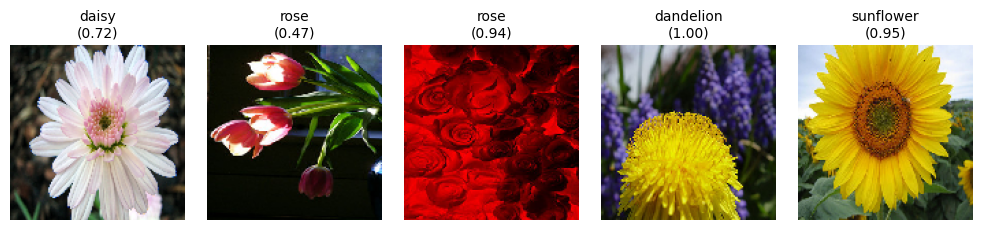

In [ ]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the saved model
model = tf.keras.models.load_model('flower_classification_best_custom.h5')

# Define the class labels
ref = dict(zip(list(train_generator.class_indices.values()) , list(train_generator.class_indices.keys())))

# Set the path of the test folder
test_dir = 'Flower_Classification/Test/'

# Get the file names of the test images
test_files = os.listdir(test_dir)

# Set the figure size and subplot layout
fig = plt.figure(figsize=(10, 10))
rows = 5
cols = 5

# Loop over the test images and predict the class labels
for i, file in enumerate(test_files):
    # Load the test image
    image_path = os.path.join(test_dir, file)
    # Load the image
    img = load_img(image_path, target_size=(224, 224))
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Reshape the array to match the input shape of the model
    img_array = img_array.reshape((1, 224, 224, 3))
    # Preprocess the image
    img_array = img_array / 255.0
    # Predict the class label



    # Predict the class label and confidence score
    prediction = model.predict(img_array)
    class_label = ref[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Add the subplot
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img_array[0])
    plt.axis('off')

    # Set the subplot title to the predicted class label and confidence score
    plt.title(f"{class_label}\n({confidence:.2f})", fontsize=10)

# Adjust the subplot layout and show the plot
fig.tight_layout()
plt.show()
